# Data Science com Python <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png" width="40" height="40" align="center"/> 
## Parte 05: Gráfico boxplot

Em análise de dados, estamos interessados em comparar grupos categóricos tanto em relação a medidas de posição quanto em relação a medidas de dispersão. Uma forma eficiente de visualizar essas medidas é através do gráfico _boxplot_. Continuaremos com o exemplo dos dados imobiliários da cidade de Melbourn, Austrália.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/housing_ok.csv')
housing.quartos = housing.quartos.astype('int8')
housing.banheiros = housing.banheiros.astype('int8')
housing.vagas = housing.vagas.astype('int8')

Para entender como funciona a interpretação do gráfico _boxplot_, faremos a plotagem do gráfico para as distâncias do aeroporto. Para tanto, utilizaremos o comando [```DataFrame.boxplot()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), definindo o parâmetro ```column='nome_da_coluna'```.

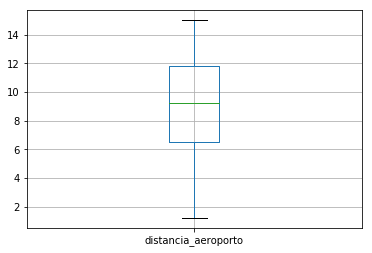

In [18]:
housing.boxplot(column='distancia_aeroporto')

Nos traços superior e inferior (conhecidos em inglês como _whiskers_), temos o valor da mediana mais e menos 1.5 * IQR (IQR = Q3 - Q1). Pontos fora desses limites são identificado com um círculo e são chamado de _outliers_.
No limite inferior do retângulo temos o primeiro quartil (25%), seguido da mediana (representada pela linha na cor laranja). O limite superior do retângulo representa o terceiro quartil (75%).

A plotagem de um _boxplot_ com apenas um diagrama não oferece muita informação. A aplicação mais interessante desse tipo de gráfico aparece na comparação de dados categóricos.

Faremos a plotagem dos preços para os três tipos de imóvel: apartamento, casa e kitnet. A forma mais direta de criação do gráfico _boxplot_ é através do uso da função interna do ```DataFrame``` com a notação ```DataFrame.boxplot(column=nome_da_coluna_alvo, by=nome_da_coluna_gategorica)```.

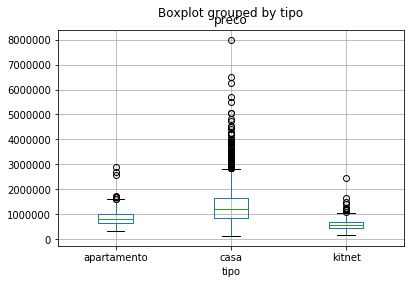

In [13]:
housing.boxplot(column='preco', by='tipo')

Por conta dos _outlier_, o resultado gerado é de difícil análise. Para eliminar os _outliers_, basta acrescentarmos o parâmetro ```showfliers=False```.

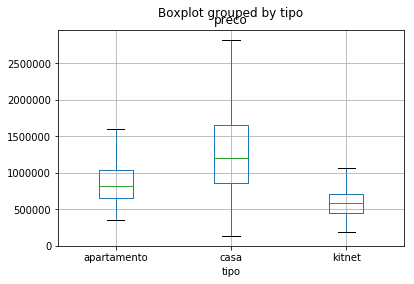

In [5]:
housing.boxplot(column='preco', by='tipo', showfliers=False)

Analisando o resultado sem _outliers_, podemos afirmar que  a maioria das casas possui preço superior ao dos apartamentos. O mesmo pode ser afirmado em relação aos apartamentos e kitnets.

Faremos a mesma análise mas agora em relação a área construida.

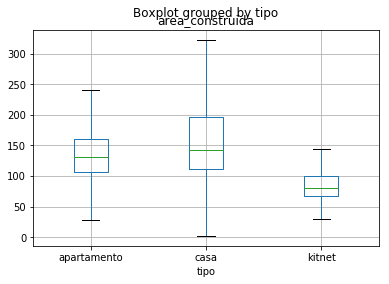

In [9]:
housing.boxplot(column='area_construida', by='tipo', showfliers=False)

Olhando para o resultado, observamos que boa parte das casas possui tamanho na mesma faixa dos apartamentos. Porém, dentre os maiores imóveis, as casas possuem maior representatividade. Quanto aos kitnets, apesar de existirem algumas unidades de tamanho maior que muitas casas e apartamentos, a maioria possui tamanho menor que as duas outras categorias.

### Analisando mais de uma coluna
O parâmetro ```column``` pode também receber uma lista de colunas. Nesse caso, o mesmo eixo $y$ será utilizado para mostras as informações. No exemplo abaixo temos o gráfico boxplot para a área construída e a área do terreno para cada tipo de imóvel.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa1783470>,
      dtype=object)

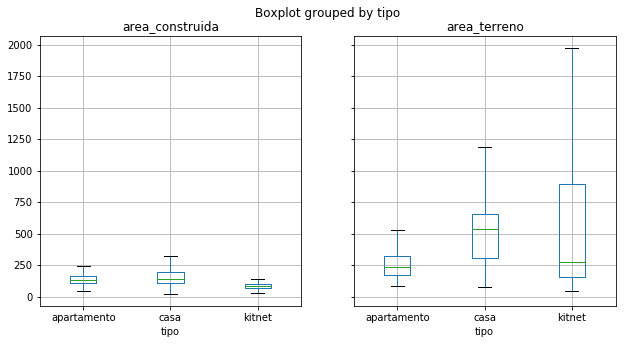

In [15]:
housing.boxplot(column=['area_construida', 'area_terreno'], by='tipo', showfliers=False, figsize=(10, 5))

### Analisando mais de um grupo
De maneira análoga, podemos também analisar o valor de uma coluna em relação a combinação de mais de um grupo. Por exemplo, para analisar o preço dos imóveis por tipo e por número de quartos, basta passarmos ao parâmetro ```by``` uma lista contendo as duas categorias. O resultado será um gráfico boxplot do preço para cada combinação de tipo e número de quartos. Para melhorar a visualização, modificaremos o tamanho do gráfico definindo o parâmetro ```figsize=(15, 4)``` e a orientação dos valores do eixo $x$ definindo o parâmetro ```rot=45```. 

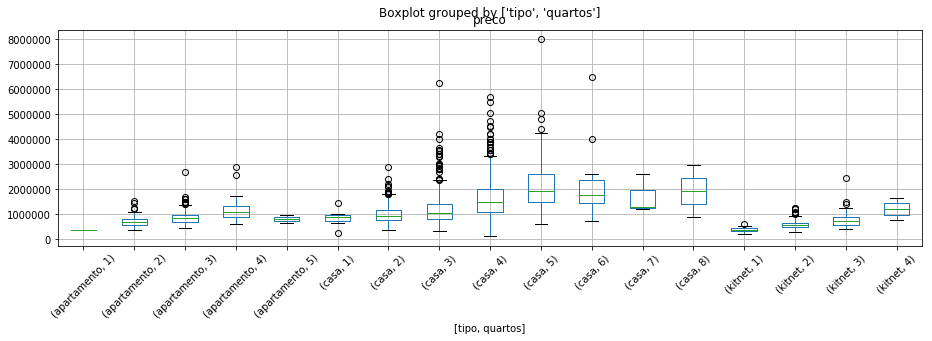

In [23]:
housing.boxplot(column='preco', by=['tipo', 'quartos'], figsize=(15, 4), rot=45)